In [11]:
import xarray as xr
import numpy as np
from geopy import distance
from matplotlib import pyplot as plt
import cartopy as cy
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import requests
import math


In [8]:
url = 'https://thredds.met.no/thredds/fileServer/fou-hi/mywavewam800s/MyWave_wam800_c4WAVE06.nc'
ds =  xr.open_dataset('/home/anna/Downloads/mywavewam800_skagerak.an.2024081718.nc')
ds.projection_3

<xarray.DataArray 'projection_3' ()> Size: 4B
[1 values with dtype=int32]
Attributes:
    grid_mapping_name:          rotated_latitude_longitude
    grid_north_pole_longitude:  140.0
    grid_north_pole_latitude:   22.0
    earth_radius:               6371000.0
    proj4:                      +proj=ob_tran +o_proj=longlat +lon_0=-40 +o_l...

# displaying singificant wave height for whole area of skagerak

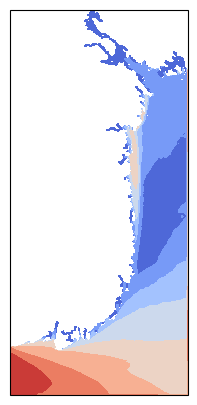

In [9]:
oblique_proj = ccrs.ObliqueMercator(
    central_longitude=ds.projection_3.grid_north_pole_longitude, 
    central_latitude=ds.projection_3.grid_north_pole_latitude)
hs_swell = ds.isel(time=0)['hs_swell']
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=oblique_proj)
contour = ax.contourf(ds.rlon, ds.rlat, hs_swell, cmap='coolwarm')

# I'm searching the grid points that contains wave data and  closest to my point of interest - Saltstein beach - with salt lon and lat lat

In [54]:
salt_lat = 58.965394
salt_lon = 9.850742
salt = (salt_lat, salt_lon)
min_dist = 1
min_rlat = 0
min_rlon = 0
neighbour_grid_centres = []
for rlat in  range (0,len(ds.rlat)):
    for rlon in range (0,len(ds.rlon)):
        lon = ds['longitude'].isel(rlon=rlon, rlat=rlat).values.item(0)
        lat = ds['latitude'].isel(rlon=rlon, rlat=rlat).values.item(0)
        if lat < 58.9 or lat > 59:
            continue
        if lon < 9.8 or lon > 9.9:
            continue 
        test_point = (lat, lon)
        temp_dist = distance.distance(salt,test_point)
        if temp_dist < 2:
            #only interested in points that have wave value, so no land points, only points on sea
            if not math.isnan(hs_swell[rlat,rlon].values.tolist()):
                print("found point:", rlon, rlat, lon, lat, temp_dist)
                neighbour_grid_centres.append((rlon, rlat, round(temp_dist.km,2)))
            if temp_dist < min_dist:
                min_dist = temp_dist
                min_rlat = rlat
                min_rlon = rlon            

found point: 128 271 9.823464393615723 58.96019744873047 1.6728278614803689 km
found point: 129 271 9.834416389465332 58.954532623291016 1.53177629172928 km
found point: 130 271 9.84537124633789 58.948856353759766 1.8679475463423518 km
found point: 130 272 9.856358528137207 58.954505920410156 1.2551918622190301 km
found point: 130 273 9.867372512817383 58.960140228271484 1.1216584926430337 km
found point: 131 273 9.878314018249512 58.954463958740234 1.9998902727150731 km
found point: 130 274 9.878365516662598 58.96577835083008 1.589830440978429 km


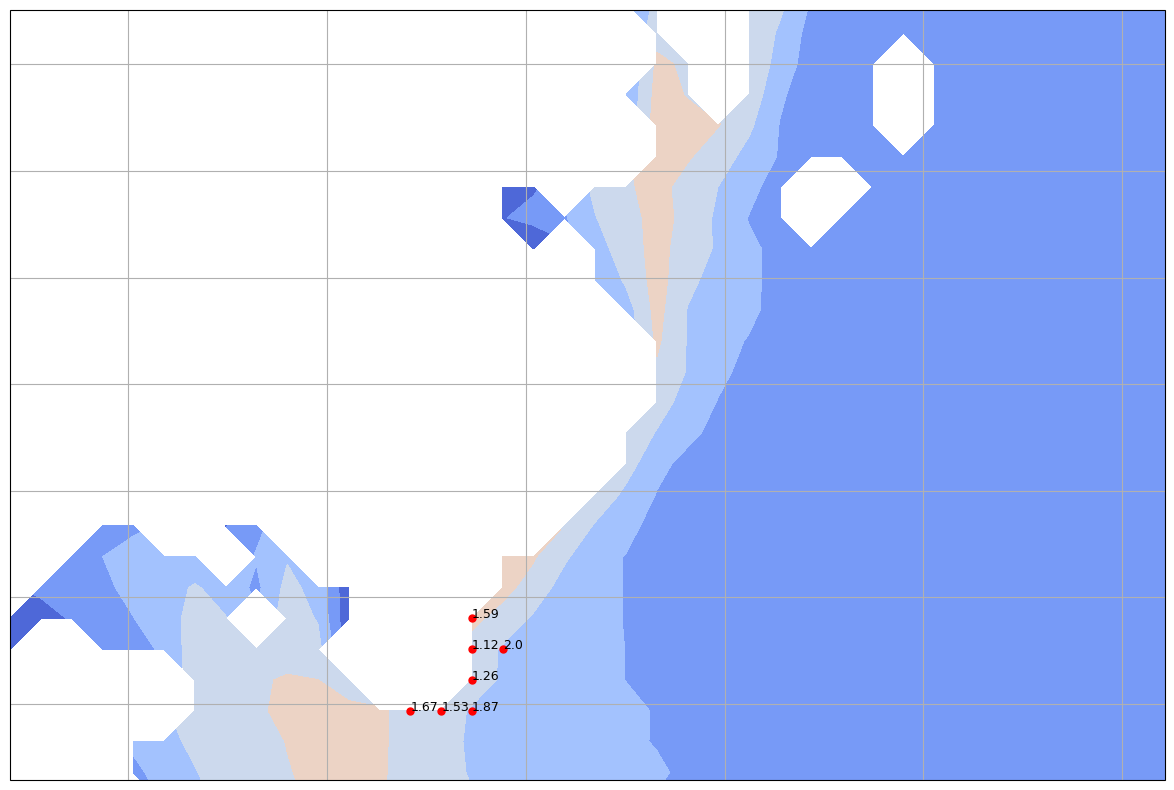

In [59]:
oblique_proj = ccrs.ObliqueMercator(
    central_longitude=ds.projection_3.grid_north_pole_longitude, 
    central_latitude=ds.projection_3.grid_north_pole_latitude)
hs_swell = ds.isel(time=0)['hs_swell']
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=oblique_proj)
for p in neighbour_grid_centres:
    ax.plot( ds.rlon[p[0]].item(), ds.rlat[p[1]].item(), marker='o', markersize = 5, color = 'red', label = "Salt")
    ax.text(ds.rlon[p[0]].item(), ds.rlat[p[1]].item(), p[2],fontsize=9, color='black')

ax.set_extent([23.1, 23.4, 0.7, 0.9], crs=oblique_proj)
#ax.coastlines(resolution='10m')  
contour = ax.contourf(ds.rlon, ds.rlat, hs_swell, cmap='coolwarm')
ax.gridlines(crs=ccrs.PlateCarree())

![title](Salt.png)


# when I zoom in

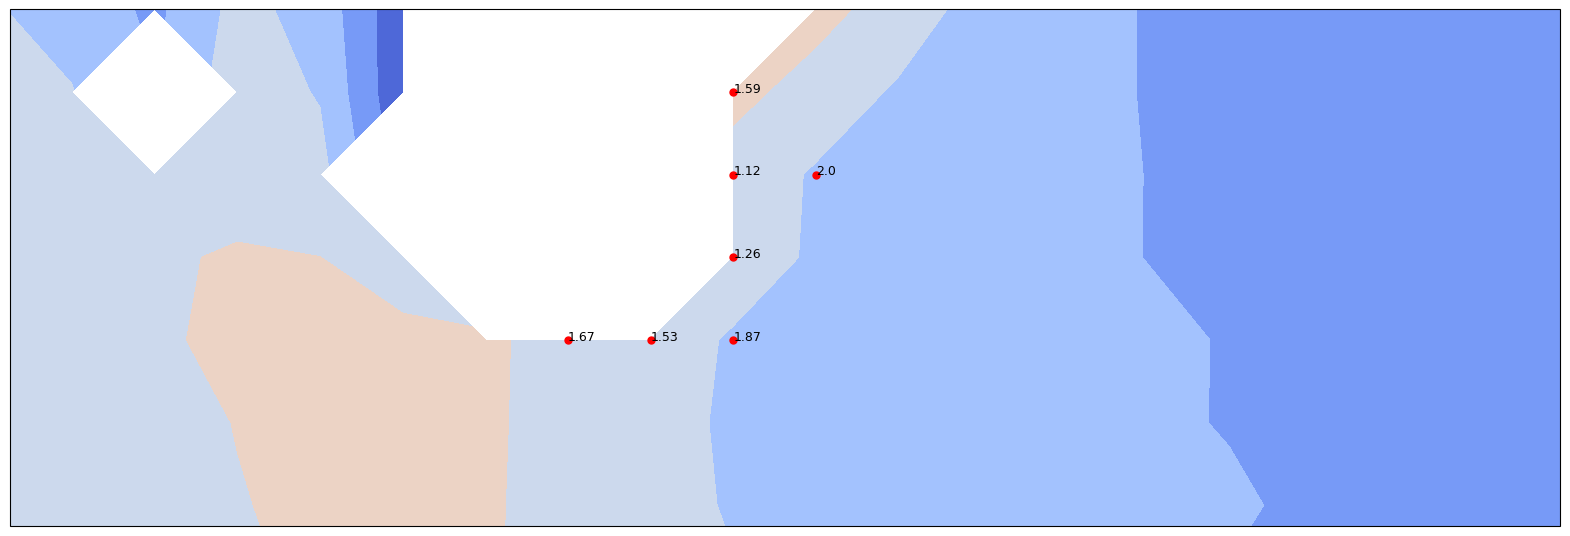

In [72]:
oblique_proj = ccrs.ObliqueMercator(
    central_longitude=ds.projection_3.grid_north_pole_longitude, 
    central_latitude=ds.projection_3.grid_north_pole_latitude)
hs_swell = ds.isel(time=0)['hs_swell']
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=oblique_proj)
for p in neighbour_grid_centres:
    ax.plot( ds.rlon[p[0]].item(), ds.rlat[p[1]].item(), marker='o', markersize = 5, color = 'red', label = "Salt")
    ax.text(ds.rlon[p[0]].item(), ds.rlat[p[1]].item(), p[2],fontsize=9, color='black')

ax.set_extent([23.15, 23.3, 0.7, 0.75], crs=oblique_proj)
contour = ax.contourf(ds.rlon, ds.rlat, hs_swell, cmap='coolwarm')
#ax.gridlines(crs=ccrs.PlateCarree())